<a href="https://www.kaggle.com/code/markmechail/brain-tumor-classification-using-resnet50?scriptVersionId=156766716" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [37]:
# ! pip install imutils

In [38]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from PIL import Image
import tensorflow as tf
import cv2
import seaborn as sns
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import os
from tqdm import tqdm
import imutils
import keras
from keras.applications import resnet
from keras import backend as K
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization,Activation,GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import imagenet_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
IMG_SIZE = 256
training = '/kaggle/input/brain-tumor-mri-dataset/Training'
testing = '/kaggle/input/brain-tumor-mri-dataset/Testing'

In [39]:
# def crop_img(img):
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     gray = cv2.GaussianBlur(gray, (3, 3), 0)

#     # threshold the image, then perform a series of erosions +
#     # dilations to remove any small regions of noise
#     thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
#     thresh = cv2.erode(thresh, None, iterations=2)
#     thresh = cv2.dilate(thresh, None, iterations=2)

#     # find contours in thresholded image, then grab the largest one
#     cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     cnts = imutils.grab_contours(cnts)
#     c = max(cnts, key=cv2.contourArea)

#     # find the extreme points
#     extLeft = tuple(c[c[:, :, 0].argmin()][0])
#     extRight = tuple(c[c[:, :, 0].argmax()][0])
#     extTop = tuple(c[c[:, :, 1].argmin()][0])
#     extBot = tuple(c[c[:, :, 1].argmax()][0])
#     ADD_PIXELS = 0
#     new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

#     return new_img

In [40]:
# training_dir = os.listdir(training)
# testing_dir = os.listdir(testing)
# trainData = []
# trainLabels = []
# label = 0

# for dir in training_dir:
#     save_path = 'cleaned/Training/'+ dir
#     path = os.path.join(training,dir)
#     image_dir = os.listdir(path)
#     for img in image_dir:
#         image = cv2.imread(os.path.join(path,img))
#         new_img = crop_img(image)
#         new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
#         if not os.path.exists(save_path):
#             os.makedirs(save_path)
#         cv2.imwrite(save_path+'/'+img, new_img)

# for dir in testing_dir:
#     save_path = 'cleaned/Testing/'+ dir
#     path = os.path.join(testing,dir)
#     image_dir = os.listdir(path)
#     for img in image_dir:
#         image = cv2.imread(os.path.join(path,img))
#         new_img = crop_img(image)
#         new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
#         if not os.path.exists(save_path):
#             os.makedirs(save_path)
#         cv2.imwrite(save_path+'/'+img, new_img)



In [41]:
trainData=[]
trainLabels=[]

for root, _, files in os.walk('/kaggle/input/brain-tumor-mri-dataset/Training/notumor'):
  for file in files:
    if file.endswith('.jpg'):
      image_path = os.path.join(root,file)
      if 'notumor' in image_path:
        label = 0
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224,224))
        image_array = np.array(image)
        trainData.append(image_array)
        trainLabels.append(label)
        #print(f"Image Path: {image_path}, Label: {label}")
for root, _, files in os.walk('/kaggle/input/brain-tumor-mri-dataset/Training/glioma'):
  for file in files:
    if file.endswith('.jpg'):
      image_path = os.path.join(root,file)
      if 'glioma' in image_path:
        label = 1
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224,224))
        image_array = np.array(image)
        trainData.append(image_array)
        trainLabels.append(label)
        #print(f"Image Path: {image_path}, Label: {label}")
for root, _, files in os.walk('/kaggle/input/brain-tumor-mri-dataset/Training/pituitary'):
  for file in files:
    if file.endswith('.jpg'):
      image_path = os.path.join(root,file)
      if 'pituitary' in image_path:
        label = 2
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224,224))
        image_array = np.array(image)
        trainData.append(image_array)
        trainLabels.append(label)
        #print(f"Image Path: {image_path}, Label: {label}")
for root, _, files in os.walk('/kaggle/input/brain-tumor-mri-dataset/Training/meningioma'):
  for file in files:
    if file.endswith('.jpg'):
      image_path = os.path.join(root,file)
      if 'meningioma' in image_path:
        label = 3
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224,224))
        image_array = np.array(image)
        trainData.append(image_array)
        trainLabels.append(label)
        #print(f"Image Path: {image_path}, Label: {label}")

In [42]:
# trainData = np.array(trainData)
# trainData = trainData/255.0
# print(trainData.shape)

In [43]:
testData=[]
testLabels=[]

for root, _, files in os.walk('/kaggle/input/brain-tumor-mri-dataset/Testing/notumor'):
  for file in files:
    if file.endswith('.jpg'):
      image_path = os.path.join(root,file)
      if 'notumor' in image_path:
        label = 0
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224,224))
        image_array = np.array(image)
        testData.append(image_array)
        testLabels.append(label)
        #print(f"Image Path: {image_path}, Label: {label}")
for root, _, files in os.walk('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma'):
  for file in files:
    if file.endswith('.jpg'):
      image_path = os.path.join(root,file)
      if 'glioma' in image_path:
        label = 1
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224,224))
        image_array = np.array(image)
        testData.append(image_array)
        testLabels.append(label)
        #print(f"Image Path: {image_path}, Label: {label}")
for root, _, files in os.walk('/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary'):
  for file in files:
    if file.endswith('.jpg'):
      image_path = os.path.join(root,file)
      if 'pituitary' in image_path:
        label = 2
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224,224))
        image_array = np.array(image)
        testData.append(image_array)
        testLabels.append(label)
        #print(f"Image Path: {image_path}, Label: {label}")
for root, _, files in os.walk('/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma'):
  for file in files:
    if file.endswith('.jpg'):
      image_path = os.path.join(root,file)
      if 'meningioma' in image_path:
        label = 3
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224,224))
        image_array = np.array(image)
        testData.append(image_array)
        testLabels.append(label)
        #print(f"Image Path: {image_path}, Label: {label}")

In [44]:
# testData = np.array(testData)
# testData = testData/255.0
# print(testData.shape)

In [45]:
# testLabels = np.array(testLabels)
# print(testLabels.shape)

In [46]:
# trainLabels = np.array(trainLabels)
# print(trainLabels.shape)

In [47]:
# valData, testData = train_test_split(testData, train_size=.5, random_state=20)

In [48]:
# valLabels, testLabels = train_test_split(testLabels, train_size=.5, random_state=20)
# print(valLabels.shape)
# print(testLabels.shape)
# print(valData.shape)
# print(testData.shape)

In [49]:
from keras.utils import to_categorical
X_train = trainData
y_train = trainLabels
X_test = testData
y_test = testLabels

y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

X_val, X_test = train_test_split(X_test, train_size=.3, random_state=20)
y_val, y_test = train_test_split(y_test, train_size=.3, random_state=20)

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)


print(f"Shape of images in X_train: {X_train.shape}")
print(f"Shape of images in X_test: {X_test.shape}")
print(f"Shape of images in X_val: {X_val.shape}")
print(f"Shape of images in y_train: {y_train.shape}")
print(f"Shape of images in y_test: {y_test.shape}")
print(f"Shape of images in y_val: {y_val.shape}")

Shape of images in X_train: (5712, 224, 224, 3)
Shape of images in X_test: (918, 224, 224, 3)
Shape of images in X_val: (393, 224, 224, 3)
Shape of images in y_train: (5712, 4)
Shape of images in y_test: (918, 4)
Shape of images in y_val: (393, 4)


In [50]:
model = resnet.ResNet50(
      input_shape = (224, 224, 3),
      include_top = False,
      weights = 'imagenet'
    )
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [51]:
for layers in model.layers:
    layers.trainable = False
    
topLayer = Flatten()(model.output)
topLayer = Dropout(0.5)(topLayer)
topLayer = Dense(4, activation = "softmax")(topLayer)
model = keras.Model(model.input, topLayer)

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = [
    'accuracy',
    tf.keras.metrics.AUC(),
    tf.keras.metrics.Recall(),
    tf.keras.metrics.Precision(),
    tf.keras.metrics.F1Score()])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [56]:
ESM = tf.keras.callbacks.EarlyStopping(patience=4, monitor='accuracy')
rn = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, verbose=1, callbacks=ESM)

Epoch 1/10
179/179 [==============================] - 10s 58ms/step - loss: 0.0662 - accuracy: 0.9977 - auc_4: 0.9993 - recall_4: 0.9977 - precision_4: 0.9977 - f1_score: 0.9976 - val_loss: 0.2860 - val_accuracy: 0.9720 - val_auc_4: 0.9830 - val_recall_4: 0.9720 - val_precision_4: 0.9720 - val_f1_score: 0.9699
Epoch 2/10
179/179 [==============================] - 10s 58ms/step - loss: 0.0574 - accuracy: 0.9982 - auc_4: 0.9994 - recall_4: 0.9982 - precision_4: 0.9982 - f1_score: 0.9982 - val_loss: 0.6759 - val_accuracy: 0.9720 - val_auc_4: 0.9829 - val_recall_4: 0.9720 - val_precision_4: 0.9720 - val_f1_score: 0.9695
Epoch 3/10
179/179 [==============================] - 10s 58ms/step - loss: 0.0552 - accuracy: 0.9988 - auc_4: 0.9995 - recall_4: 0.9988 - precision_4: 0.9988 - f1_score: 0.9987 - val_loss: 0.4758 - val_accuracy: 0.9669 - val_auc_4: 0.9779 - val_recall_4: 0.9669 - val_precision_4: 0.9669 - val_f1_score: 0.9638
Epoch 4/10
179/179 [==============================] - 11s 59ms/s

In [53]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 2s 54ms/step - loss: 0.2396 - accuracy: 0.9793 - auc_4: 0.9883 - recall_4: 0.9793 - precision_4: 0.9793 - f1_score: 0.9777


[0.23959554731845856,
 0.9793028235435486,
 0.9883430004119873,
 0.9793028235435486,
 0.9793028235435486,
 array([0.99824256, 0.9640287 , 0.9928741 , 0.95571095], dtype=float32)]

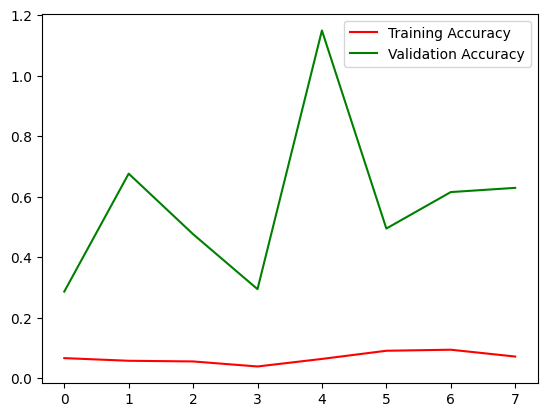

In [63]:
accuracy = rn.history['loss']
validation_accuracy = rn.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs,  validation_accuracy, 'g', label="Validation Accuracy")
plt.legend(loc=0)

plt.show()

29/29 [==============================] - 2s 50ms/step


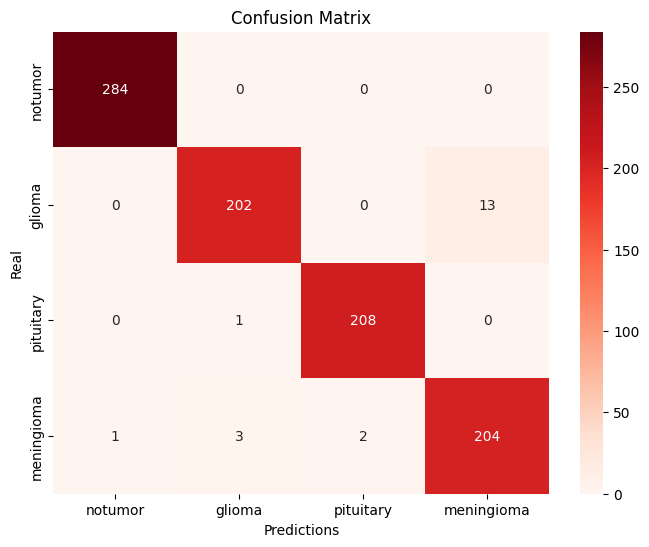

In [74]:
pred = model.predict(X_test)
classPred = np.argmax(pred, axis=1)
classLabel = np.argmax(y_test, axis=1)
con_matrix = confusion_matrix(classLabel, classPred)

plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['notumor','glioma', 'pituitary' ,'meningioma'], 
            yticklabels=['notumor','glioma', 'pituitary' ,'meningioma'])

plt.xlabel('Predictions')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

In [59]:
mobileModel = keras.applications.MobileNet(input_shape=(224,224,3), include_top=False)
newModel = Sequential()
newModel.add(mobileModel)
newModel.add(Flatten())
newModel.add(Dropout(0.5))
newModel.add(Dense(4, activation="softmax"))

newModel.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = [
    'accuracy',
    tf.keras.metrics.AUC(),
    tf.keras.metrics.Recall(),
    tf.keras.metrics.Precision(),
    tf.keras.metrics.F1Score()])

newModel.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 50176)             0         
                                                                 
 dropout_7 (Dropout)         (None, 50176)             0         
                                                                 
 dense_7 (Dense)             (None, 4)                 200708    
                                                                 
Total params: 3429572 (13.08 MB)
Trainable params: 3407684 (13.00 MB)
Non-trainable params: 21888 (85.50 KB)
_________________________________________________________________


In [60]:
newModel.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=1, callbacks=ESM)

Epoch 1/10
179/179 [==============================] - 31s 81ms/step - loss: 0.4038 - accuracy: 0.8901 - auc_6: 0.9519 - recall_6: 0.8888 - precision_6: 0.8905 - f1_score: 0.8871 - val_loss: 2.9410 - val_accuracy: 0.6565 - val_auc_6: 0.7850 - val_recall_6: 0.6565 - val_precision_6: 0.6565 - val_f1_score: 0.6348
Epoch 2/10
179/179 [==============================] - 13s 72ms/step - loss: 0.0989 - accuracy: 0.9531 - auc_6: 0.9882 - recall_6: 0.9520 - precision_6: 0.9547 - f1_score: 0.9518 - val_loss: 1.0304 - val_accuracy: 0.7939 - val_auc_6: 0.8899 - val_recall_6: 0.7939 - val_precision_6: 0.7959 - val_f1_score: 0.7769
Epoch 3/10
179/179 [==============================] - 13s 72ms/step - loss: 0.0755 - accuracy: 0.9634 - auc_6: 0.9904 - recall_6: 0.9622 - precision_6: 0.9644 - f1_score: 0.9621 - val_loss: 0.3374 - val_accuracy: 0.8855 - val_auc_6: 0.9634 - val_recall_6: 0.8830 - val_precision_6: 0.8852 - val_f1_score: 0.8822
Epoch 4/10
179/179 [==============================] - 13s 72ms/s

In [61]:
newModel.evaluate(X_test, y_test)

29/29 [==============================] - 1s 31ms/step - loss: 0.0261 - accuracy: 0.9858 - auc_6: 0.9961 - recall_6: 0.9858 - precision_6: 0.9858 - f1_score: 0.9849


[0.02611677348613739,
 0.985838770866394,
 0.9961206912994385,
 0.985838770866394,
 0.985838770866394,
 array([0.99647886, 0.9789227 , 0.98806685, 0.9763033 ], dtype=float32)]

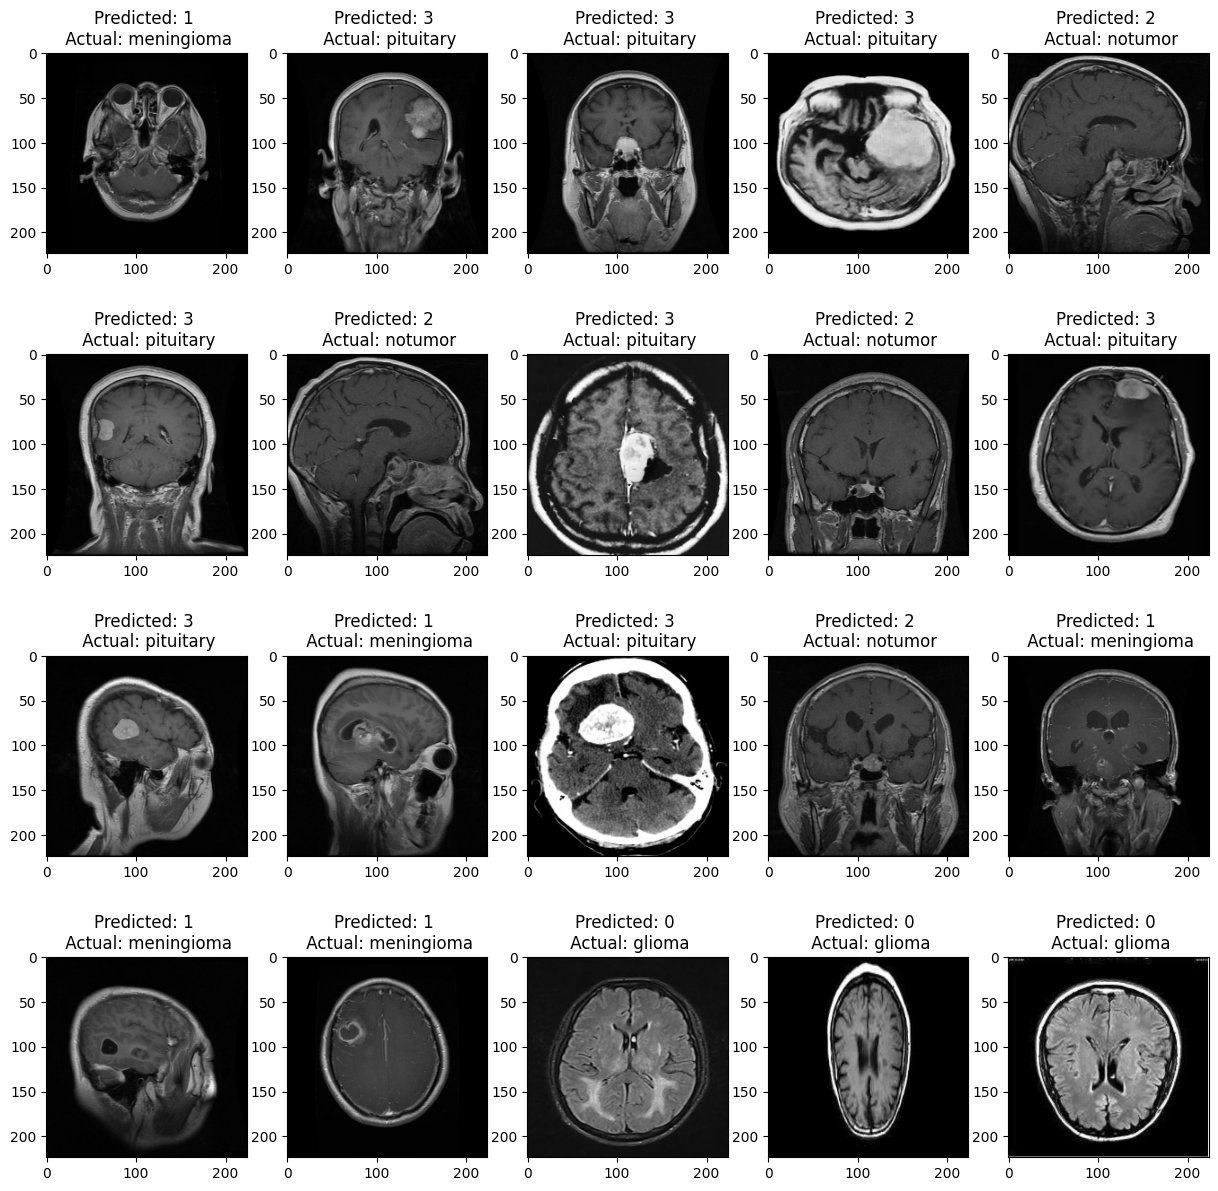

In [75]:
os.chdir("/kaggle/input/brain-tumor-mri-dataset/Testing")
dict_out = {}
test_sub_dirs = os.listdir()[::-1]
for i in range(len(test_sub_dirs)):
    dict_out.update({test_sub_dirs[i]: i})
    

actual_classes = [list(dict_out.keys())[list(dict_out.values()).index(val)] for val in classLabel]

fig, axes = plt.subplots(4, 5, figsize=(15, 15))

for i in range(20):
    axes[i//5, i%5].imshow(X_test[i])
    axes[i//5, i%5].set_title(f"Predicted: {classLabel[i]} \n Actual: {actual_classes[i]}")
plt.show()